In [3]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [4]:
import matplotlib.pyplot as plt


In [5]:
mnist = input_data.read_data_sets('MNSIT_data/',one_hot=True)

Extracting MNSIT_data/train-images-idx3-ubyte.gz


Extracting MNSIT_data/train-labels-idx1-ubyte.gz
Extracting MNSIT_data/t10k-images-idx3-ubyte.gz
Extracting MNSIT_data/t10k-labels-idx1-ubyte.gz


In [6]:
x=tf.placeholder(tf.float32,[None,784])
y=tf.placeholder(tf.float32,[None,10])

In [7]:
x_tensor = tf.reshape(x,[-1,28,28,1])

In [8]:
filter_size = 5
n_filter_1 = 16
w_conv_1= tf.Variable(tf.random_normal([filter_size,filter_size,1,n_filter_1], mean=0.0, stddev=0.01))


In [9]:
b_conv_1 = tf.Variable(tf.random_normal([n_filter_1], mean=0.0, stddev=0.01))


In [10]:
h_conv1 = tf.nn.relu(tf.nn.conv2d(input=x_tensor,filter=w_conv_1,strides=[1, 2, 2, 1],padding='SAME')
                     + b_conv_1)

In [11]:
n_filter_2 =16  
w_conv_2 = tf.Variable(tf.random_normal([filter_size,filter_size,n_filter_1,n_filter_2],
                                        mean=0.0,stddev=.01))
b_conv_2 = tf.Variable(tf.random_normal([n_filter_2],mean=0.0, stddev=0.01))

h_conv2 = tf.nn.relu(tf.nn.conv2d(input= h_conv1,filter=w_conv_2,strides=[1,2,2,1],padding='SAME')+ b_conv_2)


In [12]:
h_conv2flat = tf.reshape(h_conv2,[-1,7*7*n_filter_2])

In [15]:
n_fc = 1024
W_fc1 = tf.Variable(tf.random_normal([7*7*n_filter_2,n_fc],mean=0.0,stddev=0.01))
b_fc1 = tf.Variable(tf.random_normal([n_fc],mean=0.0,stddev=0.01))
h_fc1 = tf.nn.relu(tf.matmul(h_conv2flat,W_fc1)+b_fc1)

In [16]:
keep_prob = tf.placeholder(tf.float32)
h_fcdrop = tf.nn.dropout(h_fc1,keep_prob)

In [18]:
W_fc2 = tf.Variable(tf.random_normal([n_fc,10],mean=0.0,stddev=0.01))
b_fc2 = tf.Variable(tf.random_normal([10],mean=0.0,stddev=0.01))
y_pred = tf.nn.softmax(tf.matmul(h_fcdrop,W_fc2)+b_fc2)

In [19]:
cross_entropy = -tf.reduce_sum(y*tf.log(y_pred))
optimiser = tf.train.AdamOptimizer().minimize(cross_entropy)

In [21]:
correct_predictions= tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions,'float'))

In [22]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size =100
n_epochs= 5


In [28]:
for epoch_i in range(n_epochs):
    print(epoch_i)
    for batch_i in range(mnist.train.num_examples//batch_size):
        batch_xs, batch_ys =mnist.train.next_batch(batch_size)
        sess.run(optimiser, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.5})
        print(batch_i)
    print(sess.run(accuracy,feed_dict={x: mnist.validation.images,y: mnist.validation.labels,
                                           keep_prob: 1.0}))
        

0
0
1
2


3
4
5


6
7


8
9
10


11
12
13


14
15
16


17
18
19


20
21
22
23


24
25
26
27
28


29
30
31
32
33


34
35
36
37
38


39
40
41
42
43


44
45
46
47
48


49
50
51
52
53
54


55
56
57
58
59
60


61
62
63
64
65
66


67
68
69
70
71
72


73
74
75
76
77
78


79
80
81
82
83
84


85
86
87
88
89
90


91
92
93
94
95
96


97
98
99
100
101
102


103
104
105
106
107
108


109
110
111
112
113
114
115


116
117
118
119
120
121


122
123
124
125
126
127


128
129
130
131
132
133
134


135
136
137
138
139
140
141


142
143
144
145
146
147


148
149
150
151
152
153


154
155
156
157
158
159


160
161
162
163
164
165


166
167
168
169
170
171


172
173
174
175
176
177


178
179
180
181
182
183


184
185
186
187
188
189
190


191
192
193
194
195
196


197
198
199
200
201
202


203
204
205
206
207
208


209
210
211
212
213
214


215
216
217
218
219
220


221
222
223
224
225
226


227
228
229
230
231
232


233
234
235
236
237
238


239
240
241
242
243
244


245
246
247
248
249
250


251
252
253
254


255
256
257
258
259
260


261
262
263
264
265
266


267
268
269
270
271
272


273
274
275
276
277
278
279


280
281
282
283
284
285


286
287
288
289
290
291


292
293
294
295
296
297


298
299
300
301
302
303
304


305
306
307
308
309
310
311


312
313
314
315
316
317


318
319
320
321
322
323


324
325
326
327
328
329
330


331
332
333
334
335
336


337
338
339
340
341
342


343
344
345
346
347
348
349


350
351
352
353
354
355
356


357
358
359
360
361
362


363
364
365
366
367
368
369


370
371
372
373
374
375


376
377
378
379
380
381


382
383
384
385
386
387


388
389
390
391
392
393


394
395
396
397
398
399


400
401
402
403
404
405


406
407
408
409
410
411


412
413
414
415
416
417


418
419
420
421
422
423


424
425
426
427
428
429


430
431
432
433
434
435


436
437
438
439
440
441


442
443
444
445
446
447
448


449
450
451
452
453
454


455
456
457
458
459
460


461
462
463
464
465
466


467
468
469
470
471
472


473
474
475
476
477


478
479
480
481
482
483


484
485
486
487
488
489


490
491
492
493
494
495


496
497
498
499
500
501
502


503
504
505
506
507
508
509


510
511
512
513
514
515


516
517
518
519
520
521


522
523
524
525
526
527


528
529
530
531
532
533


534
535
536
537
538
539


540
541
542
543
544
545


546
547
548
549


0.9854
1
0
1
2
3
4


5
6
7
8
9
10


11
12
13
14
15
16


17
18
19
20
21
22


23
24
25
26
27
28


29
30
31
32
33
34


35
36
37
38
39
40


41
42
43
44
45
46
47
48


49
50
51
52
53
54


55
56
57
58
59
60


61
62
63
64
65
66


67
68
69
70
71
72


73
74
75
76
77
78


79
80
81
82
83
84


85
86
87
88
89
90


91
92
93
94
95


96
97
98
99
100


101
102
103
104
105
106


107
108
109
110
111
112


113
114
115
116
117
118


119
120
121
122
123
124


125
126
127
128
129
130


131
132
133
134
135
136


137
138
139
140
141
142


143
144
145
146
147
148


149
150
151
152
153
154


155
156
157
158
159
160


161
162
163
164
165
166


167
168
169
170
171


172
173
174
175
176


177
178
179
180
181


182
183
184
185
186


187
188
189
190


191
192
193
194


195
196
197
198


199
200
201
202


203
204
205
206


207
208
209
210


211
212
213
214


215
216
217
218


219
220
221
222


223
224
225
226


227
228
229
230


231
232
233
234


235
236
237
238


239
240
241
242


243
244
245
246


247
248
249
250


251
252
253


254
255
256
257


258
259
260
261


262
263
264
265


266
267
268


269
270
271


272
273
274
275


276
277
278
279


280
281
282
283


284
285
286
287


288
289
290
291


292
293
294
295


296
297
298
299


300
301
302
303


304
305
306
307


308
309
310
311


312
313
314
315


316
317
318
319


320
321
322
323


324
325
326
327


328
329
330
331


332
333
334
335
336


337
338
339
340
341


342
343
344
345


346
347
348
349


350
351
352
353


354
355
356


357
358
359


360
361


362
363
364


365
366
367


368
369


370
371


372
373


374
375


376
377
378


379
380
381


382
383


384
385
386


387
388
389


390
391
392


393
394


395
396


397
398
399


400
401
402


403
404
405


406
407
408


409
410
411


412
413
414


415
416
417
418


419
420
421
422


423
424
425


426
427
428
429


430
431
432
433


434
435
436
437


438
439
440
441


442
443
444
445


446
447
448
449


450
451
452
453


454
455
456
457


458
459
460


461
462
463
464


465
466
467
468


469
470
471
472


473
474
475
476


477
478
479


480
481
482


483
484
485


486
487
488


489
490
491


492
493
494


495
496
497
498


499
500
501
502


503
504
505
506


507
508
509
510


511
512
513
514


515
516
517
518


519
520
521
522


523
524
525
526
527


528
529
530
531
532


533
534
535
536
537


538
539
540
541
542


543
544
545
546
547


548
549


0.9868
2
0
1
2
3


4
5
6
7
8


9
10
11
12
13


14
15
16
17


18
19
20
21


22
23
24
25
26


27
28
29
30
31


32
33
34
35
36


37
38
39
40
41


42
43
44
45
46


47
48
49
50
51


52
53
54
55


56
57
58
59


60
61
62
63
64


65
66
67
68
69


70
71
72
73
74


75
76
77
78
79


80
81
82
83


84
85
86
87


88
89
90
91


92
93
94
95
96


97
98
99


100
101
102


103
104
105


106
107
108
109
110


111
112
113
114
115


116
117
118
119


120
121
122
123
124


125
126
127
128
129


130
131
132
133
134


135
136
137
138
139


140
141
142
143


144
145
146
147


148
149
150
151


152
153
154
155


156
157
158
159


160
161
162
163


164
165
166
167


168
169
170
171


172
173
174
175


176
177
178
179


180
181
182
183


184
185
186


187
188
189
190


191
192
193
194


195
196
197
198


199
200
201
202


203
204
205
206


207
208
209


210
211
212


213
214
215


216
217
218


219
220
221


222
223


224
225
226


227
228
229


230
231
232


233
234


235
236
237


238
239
240


241
242
243


244
245
246


247
248
249
250


251
252
253


254
255
256


257
258
259


260
261
262


263
264
265


266
267
268


269
270
271
272


273
274
275


276
277
278


279
280
281


282
283
284


285
286
287


288
289
290


291
292
293


294
295
296
297


298
299
300


301
302
303
304


305
306
307


308
309
310


311
312
313


314
315
316
317


318
319
320


321
322
323
324


325
326
327
328
329


330
331
332
333
334


335
336
337
338


339
340
341
342


343
344
345
346


347
348
349
350
351


352
353
354
355
356


357
358
359
360
361


362
363
364
365
366


367
368
369
370
371


372
373
374
375
376


377
378
379
380


381
382
383
384
385


386
387
388
389
390


391
392
393
394


395
396
397
398
399


400
401
402
403


404
405
406
407


408
409
410
411


412
413
414


415
416
417
418


419
420
421
422


423
424
425
426
427


428
429
430
431
432


433
434
435
436
437


438
439
440
441
442


443
444
445
446
447


448
449
450
451
452
453


454
455
456
457
458


459
460
461
462


463
464
465
466
467


468
469
470
471
472
473


474
475
476
477
478


479
480
481
482
483


484
485
486
487
488


489
490
491
492


493
494
495
496


497
498
499
500


501
502
503
504
505


506
507
508
509
510


511
512
513


514
515
516


517
518
519
520


521
522
523


524
525
526


527
528
529


530
531
532


533
534
535
536


537
538
539
540


541
542
543


544
545
546


547
548
549


0.9884
3
0
1
2


3
4
5
6


7
8
9
10
11


12
13
14
15
16


17
18
19


20
21
22


23
24
25
26


27
28
29
30
31
32


33
34
35
36
37
38


39
40
41
42
43


44
45
46
47
48


49
50
51
52
53


54
55
56
57
58


59
60
61
62
63


64
65
66
67
68


69
70
71
72
73


74
75
76
77
78


79
80
81
82
83


84
85
86
87
88


89
90
91
92
93
94


95
96
97
98
99
100


101
102
103
104
105
106


107
108
109
110
111


112
113
114
115
116


117
118
119
120
121


122
123
124
125
126


127
128
129
130
131


132
133
134
135
136


137
138
139
140
141


142
143
144
145
146


147
148
149
150
151


152
153
154
155
156


157
158
159
160


161
162
163
164
165


166
167
168
169
170


171
172
173
174
175


176
177
178
179
180


181
182
183
184


185
186
187
188


189
190
191
192
193


194
195
196
197
198
199


200
201
202
203
204


205
206
207
208
209


210
211
212
213
214
215


216
217
218
219
220
221


222
223
224
225
226
227


228
229
230
231
232
233


234
235
236
237
238
239


240
241
242
243
244
245


246
247
248
249
250
251


252
253
254


255
256
257
258


259
260
261
262


263
264
265
266
267


268
269
270
271
272


273
274
275
276
277
278


279
280
281
282
283


284
285
286
287
288


289
290
291


292
293
294


295
296
297


298
299
300


301
302
303


304
305
306


307
308
309
310


311
312
313
314


315
316
317


318
319
320


321
322
323


324
325
326


327
328
329


330
331
332


333
334
335


336
337
338


339
340
341


342
343
344


345
346
347


348
349
350


351
352
353


354
355
356


357
358
359
360


361
362
363


364
365
366


367
368
369


370
371
372


373
374
375


376
377
378


379
380
381


382
383
384


385
386
387


388
389
390


391
392
393
394


395
396
397


398
399
400


401
402
403


404
405
406


407
408
409


410
411
412


413
414
415


416
417
418


419
420
421


422
423
424


425
426
427


428
429
430


431
432
433


434
435
436


437
438
439


440
441
442


443
444
445


446
447
448


449
450
451


452
453
454


455
456
457


458
459
460


461
462
463


464
465
466


467
468
469


470
471
472


473
474
475


476
477
478
479
480


481
482
483
484


485
486
487
488


489
490
491
492


493
494
495
496


497
498
499
500
501


502
503
504
505
506


507
508
509
510
511


512
513
514
515


516
517
518
519


520
521
522
523


524
525
526
527
528


529
530
531
532
533


534
535
536
537


538
539
540
541


542
543
544
545


546
547
548
549


0.988
4
0
1
2
3


4
5
6
7
8


9
10
11
12
13


14
15
16
17


18
19
20
21


22
23
24
25
26


27
28
29
30
31


32
33
34
35
36


37
38
39
40
41


42
43
44
45
46


47
48
49
50
51


52
53
54
55
56


57
58
59
60
61


62
63
64
65


66
67
68
69
70


71
72
73
74
75
76


77
78
79
80
81


82
83
84
85
86


87
88
89
90
91
92


93
94
95
96
97
98


99
100
101
102
103


104
105
106
107
108


109
110
111
112
113
114


115
116
117
118
119


120
121
122
123
124


125
126
127
128
129


130
131
132
133
134


135
136
137
138


139
140
141
142
143


144
145
146
147
148


149
150
151
152
153
154


155
156
157
158
159
160


161
162
163
164
165


166
167
168
169


170
171
172
173


174
175
176
177
178
179


180
181
182
183
184


185
186
187
188
189


190
191
192
193
194


195
196
197
198
199


200
201
202
203
204


205
206
207
208


209
210
211
212
213


214
215
216
217
218
219


220
221
222
223
224


225
226
227
228


229
230
231
232
233


234
235
236
237
238


239
240
241
242
243


244
245
246
247
248


249
250
251
252
253


254
255
256
257
258
259


260
261
262
263
264


265
266
267
268


269
270
271
272
273


274
275
276
277
278


279
280
281
282


283
284
285
286
287


288
289
290
291
292


293
294
295
296
297


298
299
300
301
302


303
304
305
306
307


308
309
310
311
312


313
314
315
316


317
318
319
320


321
322
323
324
325


326
327
328
329


330
331
332
333


334
335
336


337
338
339
340


341
342
343
344


345
346
347
348
349


350
351
352
353
354


355
356
357
358
359


360
361
362
363
364


365
366
367
368
369


370
371
372
373
374


375
376
377
378
379


380
381
382
383
384


385
386
387
388
389


390
391
392
393
394


395
396
397
398
399


400
401
402
403
404


405
406
407
408
409


410
411
412
413
414


415
416
417
418
419


420
421
422
423
424


425
426
427
428
429


430
431
432
433
434


435
436
437
438


439
440
441
442


443
444
445
446
447


448
449
450
451
452


453
454
455
456
457


458
459
460
461
462


463
464
465
466
467


468
469
470
471
472


473
474
475
476
477


478
479
480
481


482
483
484
485


486
487
488
489


490
491
492
493


494
495
496
497


498
499
500
501


502
503
504
505


506
507
508
509


510
511
512
513


514
515
516
517


518
519
520


521
522
523
524


525
526
527
528
529


530
531
532
533
534


535
536
537
538
539


540
541
542
543


544
545
546
547


548
549


0.9894


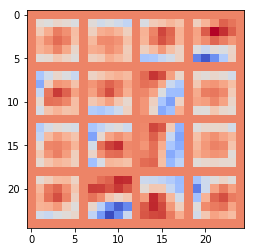

In [ ]:
import numpy as np
def montage(W):
    """Draws all filters (n_input * n_output filters) as a
    montage image separated by 1 pixel borders.
    Parameters
    ----------
    W : numpy.ndarray
        Input array to create montage of.
    Returns
    -------
    m : numpy.ndarray
        Montage image.
    """
    W = np.reshape(W, [W.shape[0], W.shape[1], 1, W.shape[2] * W.shape[3]])
    n_plots = int(np.ceil(np.sqrt(W.shape[-1])))
    m = np.ones(
        (W.shape[0] * n_plots + n_plots + 1,
         W.shape[1] * n_plots + n_plots + 1)) * 0.5
    for i in range(n_plots):
        for j in range(n_plots):
            this_filter = i * n_plots + j
            if this_filter < W.shape[-1]:
                m[1 + i + i * W.shape[0]:1 + i + (i + 1) * W.shape[0],
                  1 + j + j * W.shape[1]:1 + j + (j + 1) * W.shape[1]] = (
                    np.squeeze(W[:, :, :, this_filter]))
    return m

W = sess.run(w_conv_1)
plt.imshow(montage(W / np.max(W)), cmap='coolwarm')
plt.show()